In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

скачаем dataset MNIST и разделим данные на трен. и тест.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [74]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


стандартизация

In [3]:
x_train = x_train/255
x_test = x_test/255

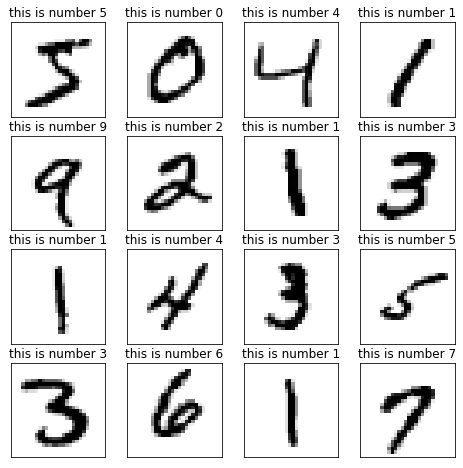

In [4]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap =plt.cm.binary)
  plt.title("this is number {}".format(y_train[i]))

Распознование цифр с помощью полносвязных сетей


In [79]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(128, activation = tf.nn.sigmoid),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [80]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [81]:
model1.fit(x_train,y_train,batch_size=32, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8864 - val_loss: 0.2460 - val_accuracy: 0.9330
Epoch 2/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2170 - accuracy: 0.9376 - val_loss: 0.1820 - val_accuracy: 0.9491
Epoch 3/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1620 - accuracy: 0.9529 - val_loss: 0.1484 - val_accuracy: 0.9581
Epoch 4/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1278 - accuracy: 0.9630 - val_loss: 0.1391 - val_accuracy: 0.9599
Epoch 5/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1045 - accuracy: 0.9695 - val_loss: 0.1143 - val_accuracy: 0.9667
Epoch 6/7
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9765 - val_loss: 0.1106 - val_accuracy: 0.9692
Epoch 7/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0728 - accuracy: 0.9804 - val_loss: 0.0984 - val_accuracy: 0.9709

проверим качество

In [82]:
print(model1.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9726
[0.08950898051261902, 0.972599983215332]


наглядная проверка

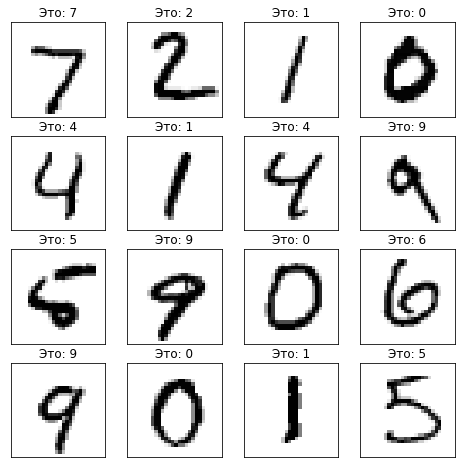

In [83]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model1.predict(x)

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")


Вторая нейронка. Она реализована на свёрточных сетях

In [91]:
model2 =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [92]:
model2.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [93]:
model2.fit(x_train.reshape(-1, 28, 28, 1),y_train, batch_size=64, epochs=7, validation_split=0.2)

Epoch 1/7
750/750 [==============================] - 44s 58ms/step - loss: 0.2330 - accuracy: 0.9334 - val_loss: 0.0873 - val_accuracy: 0.9752
Epoch 2/7
750/750 [==============================] - 44s 58ms/step - loss: 0.0721 - accuracy: 0.9787 - val_loss: 0.0654 - val_accuracy: 0.9806
Epoch 3/7
750/750 [==============================] - 45s 60ms/step - loss: 0.0455 - accuracy: 0.9866 - val_loss: 0.0604 - val_accuracy: 0.9833
Epoch 4/7
750/750 [==============================] - 44s 58ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0500 - val_accuracy: 0.9852
Epoch 5/7
750/750 [==============================] - 47s 63ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0486 - val_accuracy: 0.9855
Epoch 6/7
750/750 [==============================] - 44s 58ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0472 - val_accuracy: 0.9864
Epoch 7/7
750/750 [==============================] - 44s 58ms/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 0.0557 - val_accuracy: 0.9847

In [94]:
print(model2.evaluate(x_test.reshape(-1, 28, 28, 1),y_test))

313/313 [==============================] - 4s 11ms/step - loss: 0.0435 - accuracy: 0.9862
[0.043528832495212555, 0.9861999750137329]


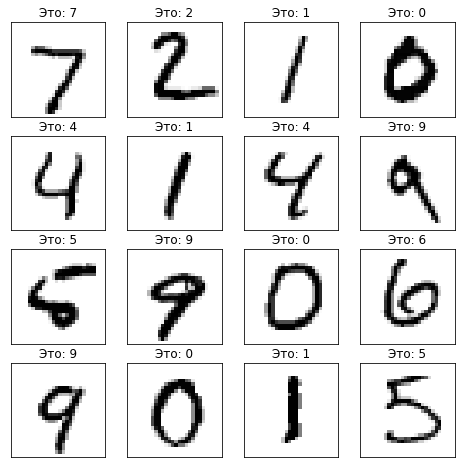

In [63]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model2.predict(x.reshape(-1, 28, 28, 1))

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")


In [123]:
model3 =  tf.keras.models.Sequential([
    #Первый коволюционный слой определяет прямые
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    #Первый коволюционный слой определяет уже углы между этими прямыми
    tf.keras.layers.Conv2D( filters=64, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [124]:
model3.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [125]:
model3.fit(x_train.reshape(-1, 28, 28, 1),y_train, batch_size=32, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 70s 47ms/step - loss: 0.1378 - accuracy: 0.9572 - val_loss: 0.0584 - val_accuracy: 0.9809
Epoch 2/7
1500/1500 [==============================] - 73s 49ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0475 - val_accuracy: 0.9869
Epoch 3/7
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0399 - val_accuracy: 0.9878
Epoch 4/7
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0493 - val_accuracy: 0.9862
Epoch 5/7
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0376 - val_accuracy: 0.9904
Epoch 6/7
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0585 - val_accuracy: 0.9878
Epoch 7/7
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0475 - val_ac

In [126]:
print(model3.evaluate(x_test.reshape(-1, 28, 28, 1),y_test))


313/313 [==============================] - 4s 13ms/step - loss: 0.0353 - accuracy: 0.9905
[0.03530866280198097, 0.9904999732971191]


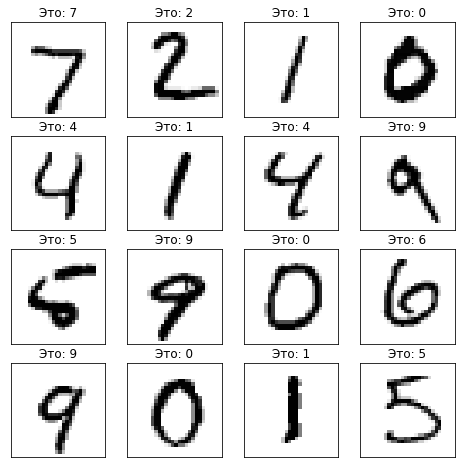

In [127]:
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  x = np.expand_dims(x_test[i], axis = 0)
  res = model3.predict(x.reshape(-1, 28, 28, 1))

  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.title(f"Это: {np.argmax(res)}")